<a href="https://colab.research.google.com/github/tapojit047/warehouse-order-automation/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx # create an empty graph
G=nx.Graph()

In [ ]:
# create example graph for R2 with weights on edges, weight 1 means toll road to distinguish from non toll roads with weight 0
G.add_edges_from([(3, 9, {'weight': 1}),(1, 4, {'weight': 1}), (1, 9,{'weight': 1}), (4,9,{'weight': 1}), (9,2, {'weight': 1}), (9,7, {'weight': 1}), (2,7, {'weight': 1}),  (2,5, {'weight': 1}),  (7,5, {'weight': 1}),  (7,8,{'weight': 1}), (5,6, {'weight': 1}), (5,8, {'weight': 1}), (5,10, {'weight': 1})])

node degree
3 1
9 5
1 2
4 2
2 3
7 4
5 5
8 2
6 1
10 1

the adjacency list
3 9
9 1 4 2 7
1 4
4
2 7 5
7 5 8
5 6 8 10
8
6
10
{(3, 9): 1, (9, 1): 1, (9, 4): 1, (9, 2): 1, (9, 7): 1, (1, 4): 1, (2, 7): 1, (2, 5): 1, (7, 5): 1, (7, 8): 1, (5, 6): 1, (5, 8): 1, (5, 10): 1}


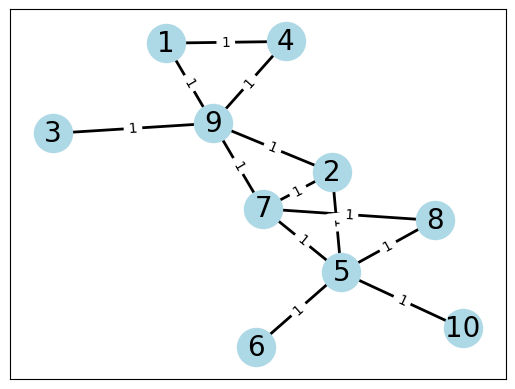

In [ ]:
import matplotlib.pyplot as plt # routine to plot the example graph

# some properties
print("node degree")
for v in nx.nodes(G):
    print(f"{v} {nx.degree(G, v)}")

print()
print("the adjacency list")
for line in nx.generate_adjlist(G):
    print(line)

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', linewidths=0.05) # draw nodes
nx.draw_networkx_edges(G, pos, edgelist=links, width=2)                               # draw edges

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels

edge_labels = nx.get_edge_attributes(G, 'weight','trips')
print(edge_labels)
#print("%.2f" % edge_labels)
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


In [ ]:
import time
from datetime import datetime, timedelta

#main loop function to start simulating the cab services

def simulate_robot_service(start_time, end_time):
    current_time = start_time

    #loop runs for every minute from 12:00AM to 11:59pm i.e 24*60=1440 times

    while current_time < end_time: # this is a new clock tick
        print(f"Current time: {current_time.strftime('%I:%M %p')}")

        #move all robots forward to synchronize their location to the current node

        #update_robot_pos=move_robot(robot, current_time, R)

                          #first of all, record current position (loc) of the robot in its routing queue R; loc=1 at start of simulation
                          # the move_robot function needs to check if the in-tray is empty
                          # and if so, set the destination node (dest) to 1;
                          # else it needs to retrieve the first order in its in-tray, extract the station number and
                          # then set the destination node (dest) to that station number
                          # it should then execute
                                path=astar(G,loc,dest)
                          # note that when the road segment (edge) from the current location
                          # to the next location is along a congested pathway (edge weight=2)
                          # then it should skip to the next clock tick
                          loc=first element in the path list
                          # we should now remove any orders in the in-tray that contain items held at the current station and insert them into the out-tray

        #transfer_orders(robot,R,I,O)

        # we can now assign new orders to robots, but first the robot needs to be assigned
        # to each order.

        #calling order generating function for generating customer orders

        #start_loc=generate_order_request(station)  station is the station number where the order item is located

        # we are now in a position to assign oders to robots
        # 1: call assign_robot for assigning an order to a robot
        #robot=assign_robot(loc,station); loc is the location at which the robot is currently at and station is the station number at which the item is located

        #insert_orders(robot,I) where I is the in-tray for that robot

        # Move time forward by one clock tick (i.e., one minute)
        current_time += timedelta(minutes=1) # Tip : adjust minutes to 60 for testing purposes so that loop runs only 24 times

    print("Simulation ended.")

In [ ]:
nx.dijkstra_path(G,2,1)  #  Find the length of the shortest path using Dijsktra's algorithm

[2, 9, 1]

In [ ]:
nx.astar_path(G,2,1) # Find the length of the shortest path using the A* algorithm.

[2, 9, 1]

In [ ]:
import networkx as nx     # generic graph for R3 onwards
#seed=1000           # seed the graph for reproducibility, you should be doing this once you generate a connected graph
#G= nx.gnp_random_graph (60, .06, seed=seed) # uncomment this and the above line once you have a connected graph.
G= nx.gnp_random_graph (100, .03)       # here we create a random binomial graph with 100 nodes and an average (expected) connectivity of 100*.06= 6.

In [ ]:
nx.is_connected(G)      # check whether G which has at least one path between each pair of nodes.

False

In [ ]:
prev_node = None
for node in nx.nodes(G):
    if prev_node != None: # we need to compare with None because when prev_node is zero the comparison gives fale
        G.add_edge(prev_node, node)

    prev_node = node

In [ ]:
nx.is_connected(G)

True

In [ ]:
# randomly allocate congested roads into the network through a binomial process
# with a probability of 0.3; congested roads are assigned a weight of 2 while
# non congested roads have a weight of 1
import random
glist=[]
for u,v in G.edges:
  glist.append((u,v))
random.shuffle(glist)
weight=1
count=0
for u, v in glist:
  if(count<len(G.edges)*0.3):
    G.add_edge(u, v, weight=2)
  else:
    G.add_edge(u, v, weight=1)
  count+=1
edge_labels = nx.get_edge_attributes(G, 'weight')

In [ ]:
# start with the graph required for R3
G= nx.gnp_random_graph (100, .06)
n=G.number_of_edges()
n

In [ ]:
# using G above, prune half of its edges randomly

import random
for u,v in G.edges():
  r=random.randint(0,100)
  if r>50: G.remove_edge(u,v)
  n=G.number_of_edges()
n

In [ ]:
# it is highly likely that the reduced graph is not connected.
# first confirm whether this is the case
nx.is_connected(G)
n=G.number_of_edges()
n
# if so, then create a connected graph from the reduced graph by applying the Watts Strogatz algorithm
G=nx.connected_watts_strogatz_graph(n, 2, 0.8, tries=100,create_using=G)
# confirm that the Watts Strogatz algorithm has succeeded
nx.is_connected(G)
n=G.number_of_edges()
n